<a href="https://colab.research.google.com/github/datascience-vivek/Polynomial_Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML Class/Advertising.csv', index_col=[0])

In [3]:
x1= df.drop(['Sales'], axis=1)

In [4]:
  x1.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
y1 = df['Sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_conv = PolynomialFeatures(degree = 2, include_bias =False)

In [8]:
poly_conv.fit(x1)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = poly_conv.transform(x1)

In [10]:
poly_features.shape

(200, 9)

In [11]:
x1.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 1, dtype: float64

In [14]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(poly_features,y1, test_size=0.3, random_state= 101)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
test_pred = model.predict(X_test)
test_pred

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, test_pred)
MAE

0.48967980448038373

In [28]:
MSE = mean_squared_error(y_test, test_pred)
MSE

0.4417505510403753

In [30]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757269274

In [32]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [35]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
  poly_converter = PolynomialFeatures(degree= d, include_bias = False)
  poly_features = poly_converter.fit_transform(x1)
  X_train, X_test, y_train, y_test, = train_test_split(poly_features,y1, test_size=0.3, random_state= 101)
  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [37]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342962601728,
 0.20872723323990588,
 5.421577514352753,
 0.14086751582412702,
 0.17118580360335042]

In [36]:
test_rmse_errors## Overfitting after 5th degreee, errors overshoot

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.5758141220971607,
 4.335318691649054,
 1379.171610491493,
 4129.0608136161545,
 96107.72947631204]

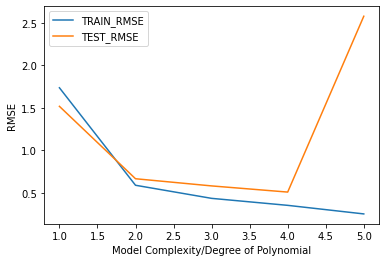

In [38]:
plt.plot(range(1,6),train_rmse_errors[:5], label= 'TRAIN_RMSE')
plt.plot(range(1,6),test_rmse_errors[:5], label= 'TEST_RMSE')
plt.xlabel('Model Complexity/Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
## We select 2nd degree polynomail features